<a href="https://colab.research.google.com/github/mohaktiwari/Machine-Learning-Projects/blob/main/MusicGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Music Genre Classification
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('features_30_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [ ]:
df=df.drop('filename',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelenc=LabelEncoder()

In [ ]:
df['label']=labelenc.fit_transform(df['label'])

In [ ]:
df['label']

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label, Length: 1000, dtype: int32

In [ ]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(df['label'])

In [ ]:
df_X=df.drop('label',axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

In [ ]:
model=Sequential()

model.add(Dense(58,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(58,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(58,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.1014 - loss: 2.4070 - val_accuracy: 0.1433 - val_loss: 2.2954
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1028 - loss: 2.3095 - val_accuracy: 0.0800 - val_loss: 2.2949
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1094 - loss: 2.2967 - val_accuracy: 0.1033 - val_loss: 2.2907
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1308 - loss: 2.2774 - val_accuracy: 0.2167 - val_loss: 2.2758
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1130 - loss: 2.2709 - val_accuracy: 0.2333 - val_loss: 2.2639
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1785 - loss: 2.2563 - val_accuracy: 0.2333 - val_loss: 2.2428
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1747 - loss: 2.2324 - val_accuracy: 0.2433 - val_loss: 2.2038
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2279 - loss: 2.1612 - val_accuracy: 0.2400 - 

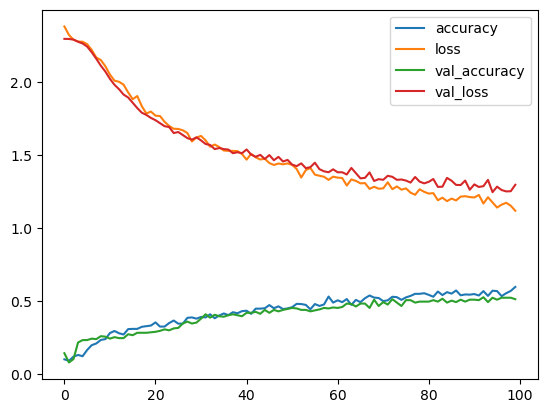

In [ ]:
losses=pd.DataFrame(model.history.history).plot()

In [ ]:
predictions=np.argmax(model.predict(X_test),axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
score=model.evaluate(X_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4928 - loss: 1.3237 


In [ ]:
y_one=df.drop('label',axis=1).iloc[109]

In [ ]:
y_one=scaler.transform(y_one.values.reshape(1,58))

In [ ]:
np.argmax(model.predict(y_one))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


1